### Описание проекта
Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1. Приоритизация гипотез.

Задача:

1) Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

2) Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

3) Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [ ]:
hypothesises = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/hypothesis.csv')
display(hypothesises.head(3))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3


Загружен df и выведены первые 3 строчки

In [ ]:
# Выведем список гипотиз
pd.set_option('display.max_colwidth', None)
display(hypothesises['Hypothesis'])

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
hypothesises['ICE'] = hypothesises['Impact'] * hypothesises['Confidence'] / hypothesises['Efforts']
display(hypothesises[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Расчитан показатель ICE. Самой приоритетной гипотизой является номер 9 - Запустить акцию, дающую скидку на товар в день рождения

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
hypothesises['RICE'] = hypothesises['Reach'] * hypothesises['Impact'] * hypothesises['Confidence'] / hypothesises['Efforts']
display(hypothesises[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Расчитан показатель RICE. Самой приоритетной гипотизой является номер 8 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [ ]:
display(hypothesises[['Hypothesis', 'ICE', 'RICE']].sort_values(by = ['ICE','RICE'], ascending = False))

,Hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


Мы видим, что у некоторых гипотез показатели ICE и RICE равны. Это означает, что дополнительный множитель в формуле равен 1 (Reach). То есть это затрагивает по сути только одного человека, поэтому некоторые гипотезы имеют разные показатели ICE и RICE, соответственно их место в приоритезации выполнения меняется. Например у 7 гипотезы RICE в 10 раз больше ICE, то есть это будет касаться 10 человек, что более существенно в работы коллектива

### Часть 2. Анализ A/B-теста

Задача

Проанализируйте A/B-тест:

1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4) Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

5) Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. Варианты решений:

1) Остановить тест, зафиксировать победу одной из групп.

2) Остановить тест, зафиксировать отсутствие различий между группами.

3) Продолжить тест.

#### Проанализируйте A/B-тест:


##### Загрузка и предобработка данных

In [ ]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/visitors.csv')

Загружен блоки данных. Предобратаем их по очереди

###### Подготовка к анализу данных по Заказам (Orders)

In [ ]:
display(orders.head(3))
print()
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
# Меняю названия столбцов на змеиный регистр
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue' , 'group']

# Меняю тип данных в 'date' на datetime
orders['date'] = pd.to_datetime(orders['date'])

#Проверяю
display(orders.head(3))

print()
orders.info()

print('\n Проверка пропусков:')
display(orders.isna().sum()) # подсчёт пропусков
print('\n Проверка явных дубликатов:', orders.duplicated().sum())

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

 Проверка пропусков:


transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


 Проверка явных дубликатов: 0


In [ ]:
# Изучим пользователей, может быть они попали в обе группы
stats_groups = orders.pivot_table(index = 'visitor_id', columns = 'group', values = 'transaction_id', aggfunc = 'count').reset_index().fillna(0)
stats_groups['matched'] = stats_groups['A'] * stats_groups['B']
display(stats_groups.query('matched >= 1').head())

# Информация по пользователям
count_unique_users_two_groups = stats_groups.query('matched >= 1')['visitor_id'].nunique()
count_users = orders['visitor_id'].nunique()
percent = round(count_unique_users_two_groups/count_users *100,2)

print('Количество уникальных пользователей:',count_users)
print()
print(f'Количество уникальных пользователей, которые есть в обеих группах: {count_unique_users_two_groups} или в процентах это {percent}%')

group,visitor_id,A,B,matched
2,8300375,1.0,1.0,1.0
44,199603092,4.0,1.0,4.0
51,232979603,1.0,1.0,1.0
55,237748145,4.0,1.0,4.0
66,276558944,1.0,1.0,1.0


Количество уникальных пользователей: 1031

Количество уникальных пользователей, которые есть в обеих группах: 58 или в процентах это 5.63%


В данных есть пользователи, которые присутствуют в обеих группах. Для анализа такие пользователи нам не подходят, они должны быть четко распределены между группами. Уберем их из датафрейма.

Должно остаться 1031 - 58 = 973 уникальных пользователей

In [ ]:
orders['isin'] = orders['visitor_id'].isin(stats_groups.query('matched >= 1')['visitor_id']) * 1
orders = orders.query('isin == 0').drop(columns = ['isin'])

print('Стало уникальных пользователей:',orders['visitor_id'].nunique())

Стало уникальных пользователей: 973


Все правильно, стало 973 уникальных пользователя. Дублирующиеся пользователи удалены

Блок данных изучен и пройден предобработку.
Были изменены названия столбцов по змеиному регистру.
Изменен тип данных в столбце с датой.
Совершена проверка на явные и неявные дубликаты, они не были обнаружены.
Также были удалены пользователи попавшие в обе группы


###### Подготовка к анализу данных по Посетителям (Visitors)

In [ ]:
display(visitors.head(3))
print()
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# Меняю тип данных в 'date' на datetime
visitors['date'] = pd.to_datetime(visitors['date'])

#Проверяю
display(visitors.head(3))

print()
visitors.info()

print('\n Проверка пропусков:')
display(visitors.isna().sum()) # подсчёт пропусков
print('\n Проверка явных дубликатов:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB

 Проверка пропусков:


date        0
group       0
visitors    0
dtype: int64


 Проверка явных дубликатов: 0


Блок данных изучен и пройден преобработку. Изменен тип данных в столбце с датой. Совершена проверка на явные и неявные дубликаты, они не были обнаружены

###### Подготовка данных

In [ ]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = (datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : 'nunique',
        'visitor_id' : 'nunique',
        'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))

visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                 .agg({'date' : 'max',
                                       'group' : 'max',
                                       'visitors' : 'sum'}), axis=1)
                                 .sort_values(by=['date','group']))

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [ ]:
min_date = cumulativeData['date'].min().date()
max_date = cumulativeData['date'].max().date()

print(f'Мы имеем данные с {min_date} по {max_date}')

Мы имеем данные с 2019-08-01 по 2019-08-31


##### График кумулятивной выручки по группам.

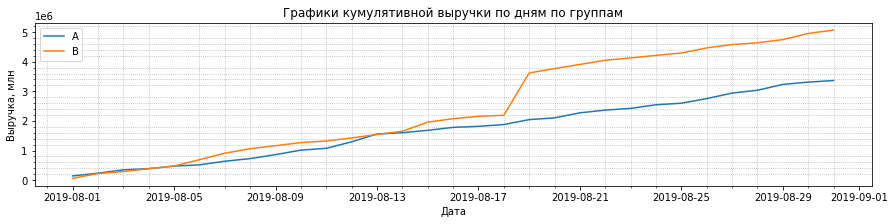

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','buyers']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','buyers']]

# Настройки графика
plt.figure(figsize=(15, 3))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('Графики кумулятивной выручки по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

Видим большой рост у группы B после 19 числа

##### График кумулятивного среднего чека по группам.

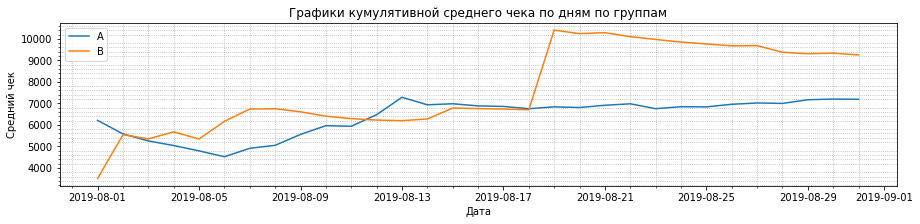

In [ ]:
# Настройки графика
plt.figure(figsize=(15, 3))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('Графики кумулятивной среднего чека по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

# Строим график кумулятивного среднего чека группы A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график кумулятивного среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.show()

Видим большой рост у группы B после 19 числа

##### График относительного изменения кумулятивного среднего чека группы B к группе A.

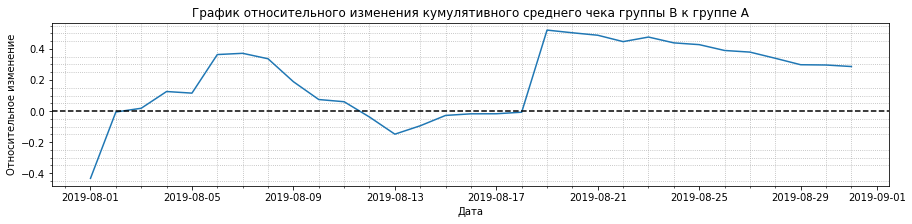

In [ ]:
# Настройки графика
plt.figure(figsize=(15, 3))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График колеблится, то вверх, то вниз

##### График кумулятивного среднего количества заказов на посетителя по группам.

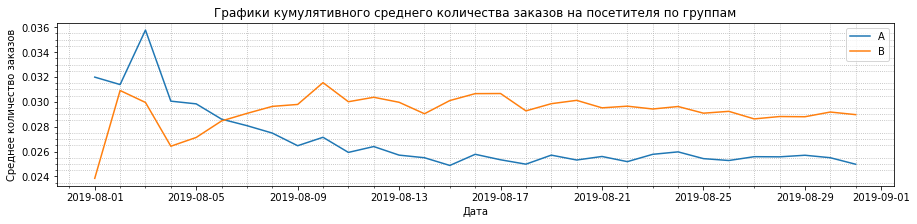

In [ ]:
# Настройки графика
plt.figure(figsize=(15, 3))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('Графики кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.show()

Группа В вырывается вперед после 6 августа и находится в лучших позициях чем группа А

#####  График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

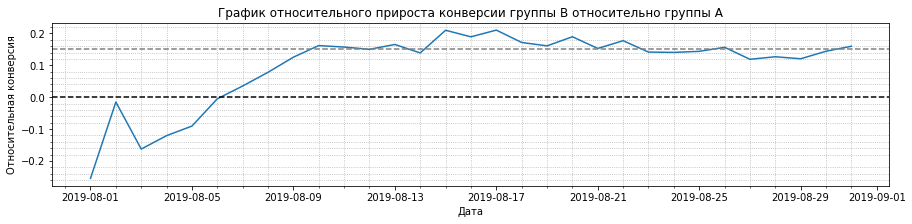

In [ ]:
# Настройки графика
plt.figure(figsize=(15, 3))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('График относительного прироста конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительная конверсия')

# Делаем расчет
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

На данном графике также видно, как группа В вырывается вперед относитльно группы А после 6 августа. После 9 числа график находится на линии около 0.15

##### Точечный график количества заказов по пользователям.

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


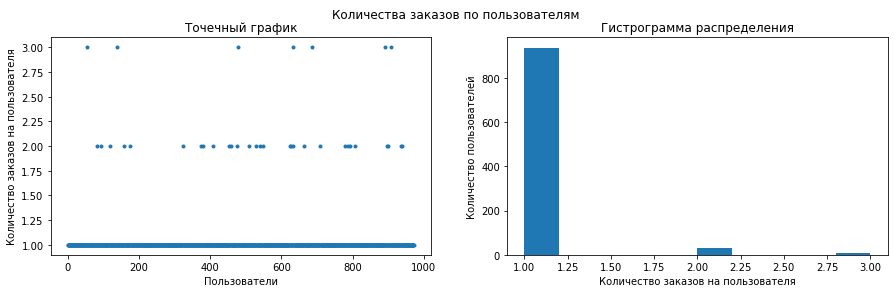

In [ ]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# Настройки графиков
plt.figure(figsize=(15, 4))
plt.suptitle('Количества заказов по пользователям')
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# График точечный
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x_values, ordersByUsers['orders'], marker='.')

# Настраиваем названия осей и название графика
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов на пользователя')
plt.title('\nТочечный график')

# Гистограмма
ax2 = plt.subplot(1, 2, 2)
ax2.hist(ordersByUsers['orders'], bins= 10 )

# Настраиваем названия осей и название графика
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Количество пользователей')
plt.title('\nГистрограмма распределения')

plt.show()

По большей части пользователи делают 1 или 2 заказа. Есть аномалии 3 - 11 заказов

##### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


99% количества заказов находятся в промежутке от 1 до 2

##### Точечный график стоимостей заказов.

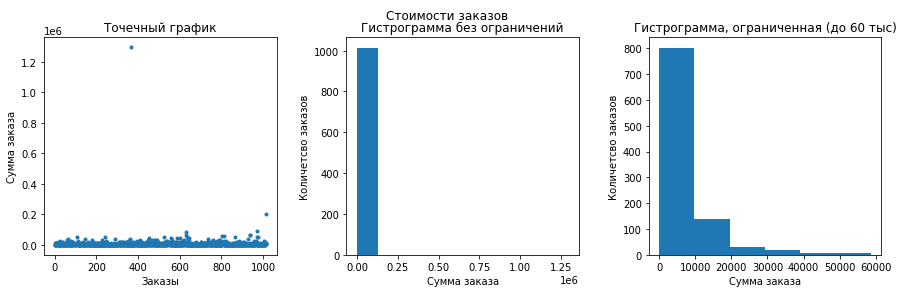

In [ ]:
x_values = pd.Series(range(0,len(orders)))

# Настройки графика
plt.figure(figsize=(15, 4))
plt.suptitle('Стоимости заказов \n ')
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# График точечный
ax1 = plt.subplot(1, 3, 1)
ax1.scatter(x_values, orders['revenue'], marker='.')

# Настраиваем названия осей и название графика
plt.xlabel('Заказы')
plt.ylabel('Сумма заказа')
plt.title('\nТочечный график')

# Гисторграмма
ax2 = plt.subplot(1, 3, 2)
ax2.hist(orders['revenue'])

# Настраиваем названия осей и название графика
plt.ylabel('Количетсво заказов')
plt.xlabel('Сумма заказа')
plt.title('\nГистрограмма без ограничений')

# Гистограмма с ограничением
ax3 = plt.subplot(1, 3, 3)
ax3.hist(orders.loc[orders['revenue']<=60000]['revenue'], bins= 6 )

# Настраиваем названия осей и название графика
plt.ylabel('Количетсво заказов')
plt.xlabel('Сумма заказа')
plt.title('\nГистрограмма, ограниченная (до 60 тыс)')

plt.show()

Присутствуют выбросы. Заказ более 1.2 млн

In [ ]:
print(orders.sort_values(by = 'revenue', ascending = False).head(1))

     transaction_id  visitor_id       date  revenue group  isin
425       590470918  1920142716 2019-08-19  1294500     B     0


На графике кумулятивной выручки он был заметен 19 августа. Вот этот выброс и был замечет на графиках

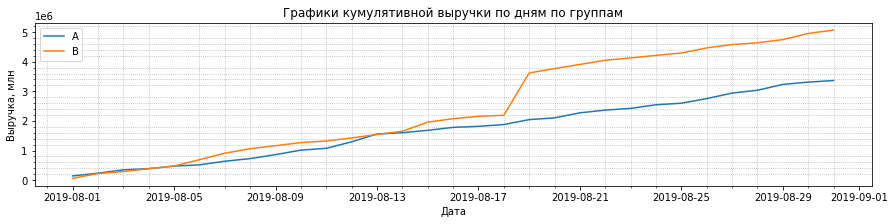

In [ ]:
# Выведу еще раз этот график

# Настройки графика
plt.figure(figsize=(15, 3))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('Графики кумулятивной выручки по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

##### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


##### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Формулирую гипотезы:

    Нулевая: различий в среднем количестве заказов между группами нет

    Альтернативная: различия в среднем количестве заказов между группами есть

Уровень значимости alpha == 0.05

In [ ]:
alpha = 0.05

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = (pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
))

sampleB = (pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
))

print("p-value равен = {0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Стандартное отклониние = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value равен = 0.0110
Стандартное отклониние = 0.160


Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу отвергаем. Также относительный проигрыш группы B равен 16.0% — второе число в выводе.

##### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Формулирую гипотезы:

    Нулевая: различий в среднем чеке между группами нет

    Альтернативная: различия в среднем чеке между группами есть

Уровень значимости alpha == 0.05

In [ ]:
print('p-value равен = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B равен = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value равен = 0.829
Относительный прирост среднего чека группы B равен = 0.287


P-value значительно больше 0.05. Значит, причин отвергаем нулевую гипотезу. Также наблюдается различие в 28.7% в относительном приросте среднего чека группы В над А. В целом это не является статистически значемым фактором. В любом случае нулевую гипотезу отвергаем

##### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Персентили количества заказов 95 и 99: 1 и 2
Персентили стоимости заказов 95 и 99: 26785 и 53904

Отбросим заказы больше 1 и с суммой заказа больше 26785

In [ ]:
orders_lim = np.percentile(orders['revenue'], 95)
revenue_lim = np.percentile(orders['revenue'], 95)

In [ ]:
#Пользователи с большим количеством заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['user_id'],
    ],
    axis=0,
)

#Пользователи с дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']

#Итого аномальные пользователи
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))

print('Количество аномальных пользователей ==',len(abnormalUsers))

#Переменные, содержащие число совершённых заказов по всем пользователям, но без аномалий
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Выведем alpha
print('\nalpha ==', alpha)

print()
#Вспоминаем грязные данные
print('По грязным данным:')
print('p-value ==',"{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в среднем количестве заказов между группами ==',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print()

#Расчёт и вывод на экран статистической значимости
print('После очистки данных:')
print('p-value  ==',"{0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительное различие в среднем количестве заказов между группами ==',"{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

568     113298937
1099    148427295
928     204675465
684     358944393
648     382846391
dtype: int64

Количество аномальных пользователей == 51

alpha == 0.05

По грязным данным:
p-value == 0.0110
Относительное различие в среднем количестве заказов между группами == 0.160

После очистки данных:
p-value  == 0.0168
Относительное различие в среднем количестве заказов между группами == 0.156


p-value  меньше 0.05, следовательно, отвергаем нулевую гипотезу и принимаем альтернативную: различия в среднем количестве заказов между группами есть

При этом различия в среднем количестве заказов на посетителя между группами А и В уменьшилось с 16,0% до 15,6%

##### Cтатистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Формулирую гипотезы:

    Нулевая: различий в среднем чеке между группами нет
    
    Альтернативная: различия в среднем чеке между группами есть
    
Уровень значимости alpha == 0.05

In [ ]:
# Выведем alpha
print('alpha ==', alpha)

print()

#Вспоминаем грязные данные
print('По грязным данным:')
print('p-value для сравнения средних чеков между группами ==',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                orders['group'] == 'A'
            ]['revenue'],
            orders[

                    orders['group'] == 'B'

            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B ==',
    "{0:.3f}".format(
        orders[

                orders['group'] == 'B'

        ]['revenue'].mean()
        / orders[

                orders['group'] == 'A'

        ]['revenue'].mean()
        - 1
    )
)

orders_A_filtred = orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']
orders_B_filtred = orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']

print()
print('После очистки данных:')
print('p-value для сравнения средних чеков между группами ==',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_A_filtred,
            orders_B_filtred)
        [1]))

print('Относительный прирост среднего чека группы B ==',
    "{0:.3f}".format(
        orders_B_filtred.mean()
        / orders_A_filtred.mean()
        - 1
    )
)

alpha == 0.05

По грязным данным:
p-value для сравнения средних чеков между группами == 0.829
Относительный прирост среднего чека группы B == 0.287

После очистки данных:
p-value для сравнения средних чеков между группами == 0.741
Относительный прирост среднего чека группы B == -0.053


p-value больше 0.05, следовательно, принимаем нулевую гипотезу: различий в среднем чеке между группами нет

Средний чек по группе В стал меньше чека в группе А, на 5 % (был больше на 28%)

#### Решение по результатам теста и его объяснение

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Тест можно останавливать и зафиксировать победу группы В. При отсутсвии отличия в среднем чеке группа В выигрывает в среднем количестве заказов на пользователя

### Итоговый вывод

Общий вывод: Наиболее приоритетными гипотезами при использовании метода ICE являются теории:

Запустить акцию, дающую скидку на товар в день рождения
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
При использовании метода RICE наимболее приоритетными являются теории:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Такое несоответствие приоритетов вызвано параметром Reach(скольких пользователей затронет изменение, которое вы хотите внести).

При этом гипотезы Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок входят в тройку гипотез по каждому из методов

Коммулятивная выручка в группе В превышает коммулятивную выручку в группе А на неочищенных данных. На графике четко виден скачёк 19 августа из-за аномального заказа transaction_id == 590470918 от 19 августа 2019 года на 1,2 миллиона денег. Этот же заказ повлиял на коммулятивный средний чек по группам, сделав показатель по группе В сильно выше группы А.

График кумулятивного среднего количества заказов на посетителя по группам показывает нам, что количество заказов в группе В больше, чем в А

В группах А и В присутсвуют аномалии как по количеству заказов на человека, так и по сумме заказов.

К аномалиям можно отнести как пользователей с количеством заказов больше, чем 2 и заказы на сумму больше 27000

По сырым и очищенным данным различия в среднем количестве заказов между группами есть. В группе В среднее количество заказов на пользователя больше, чем в группе А.

По сырым и очищенным данным различий в среднем чеке между группами нет

Тест можно останавливать и зафиксировать победу группы В. При отсутсвии отличия в среднем чеке группа В выигрывает в среднем количестве заказов на пользователя